In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

In [2]:
from pca_calc import pca_train_110,  pca_test_110, class_mapping, test_labels, train_labels, pca_train_2, pca_test_2, pca_train, pca_test

Use the next code chunk for calcuating the metrics with **raw data**

In [31]:
# # # file pathes for raw data:
# train_path = './MLProject2024/fashion_train.npy'
# test_path = './MLProject2024/fashion_test.npy'

# # load data
# train_data = np.load(train_path)
# test_data = np.load(test_path)

# #defining the X an y training and testing data
# X_train, y_train = train_data[:, : -1], train_data[:, -1]
# X_test, y_test = test_data[:, : -1], test_data[:, -1]

Use the next code chunk for calcuating the metrics with **full pca** data

In [32]:
# # #defining the X an y training and testing data (with PCA)
# # - why do we have worse results pca_data 
# X_train, y_train = pca_train, train_labels
# X_test, y_test = pca_test, test_labels

Use this code chunk for calcuating the metrics with **pca data with 2** features

In [ ]:
# # #defining the X an y training and testing data (with PCA)
# # - why do we have worse results pca_data ??
# X_train, y_train = pca_train_2, train_labels
# X_test, y_test = pca_test_2, test_labels

Use this code chunk for calcuating the metrics with **pca data with 110** features

In [41]:
# #defining the X an y training and testing data (with PCA)
# - why do we have worse results pca_data 
X_train, y_train = pca_train_110, train_labels
X_test, y_test = pca_test_110, test_labels

#### 1. KNN 

In [35]:
# fitting more neighbours: 
k_values = [i for i in range(1,31)]
knn_fit = []

for k in k_values:
    knn_fit.append(KNeighborsClassifier(k).fit(X_train,y_train))

In [36]:
# make predictions and measure accuracy for each model:
y_pred = []
for knn_classifier in knn_fit:
    y_pred.append(knn_classifier.predict(X_test))

# calcualte accuracy
accuracy_values = []
for pred in y_pred: 
    accuracy_values.append(accuracy_score(y_test,pred))

In [37]:
#add recall for further evaluation
recall_values = []
for pred in y_pred:
    recall_values.append(recall_score(y_test, pred, average='macro')) #macro gives equal weight to each class


In [38]:
#add precision
precision_values = []
for i in range(len(y_pred)):
    precision_values.append(precision_score(y_test, y_pred[i], average='macro'))


In [39]:
# F1 score
f1_scores = []
for i in range(len(y_pred)):
    f1_scores.append(f1_score(y_test, y_pred[i], average='macro'))
    

In [40]:
#creating a table with all the scores calcualted before

print("{:<10} | {:^10} | {:^10} | {:^10} | {:^10}".format("Neighbors", "Accuracy", "Recall", "Precision", "F1"))
print("-" * 60)
for i in range(len(k_values)):
    print("{:<10} | {:^10.5f} | {:^10.5f} | {:^10.5f} | {:^10.5f}".format(
        k_values[i], accuracy_values[i], recall_values[i], precision_values[i], f1_scores[i]
    ))

Neighbors  |  Accuracy  |   Recall   | Precision  |     F1    
------------------------------------------------------------
1          |  0.50680   |  0.50680   |  0.50865   |  0.50748  
2          |  0.52500   |  0.52500   |  0.50741   |  0.49134  
3          |  0.53100   |  0.53100   |  0.52802   |  0.52445  
4          |  0.55680   |  0.55680   |  0.53917   |  0.53841  
5          |  0.56580   |  0.56580   |  0.55838   |  0.55681  
6          |  0.57560   |  0.57560   |  0.56284   |  0.55995  
7          |  0.57180   |  0.57180   |  0.56350   |  0.56200  
8          |  0.56920   |  0.56920   |  0.55750   |  0.55632  
9          |  0.57760   |  0.57760   |  0.57052   |  0.56878  
10         |  0.58060   |  0.58060   |  0.57013   |  0.56925  
11         |  0.58600   |  0.58600   |  0.57945   |  0.57712  
12         |  0.58920   |  0.58920   |  0.57957   |  0.57747  
13         |  0.59520   |  0.59520   |  0.58920   |  0.58644  
14         |  0.59440   |  0.59440   |  0.58565   |  0.58

In [41]:
#calcuating the highest precision neighbour
max_index = precision_values.index(max(precision_values))
max_index

27

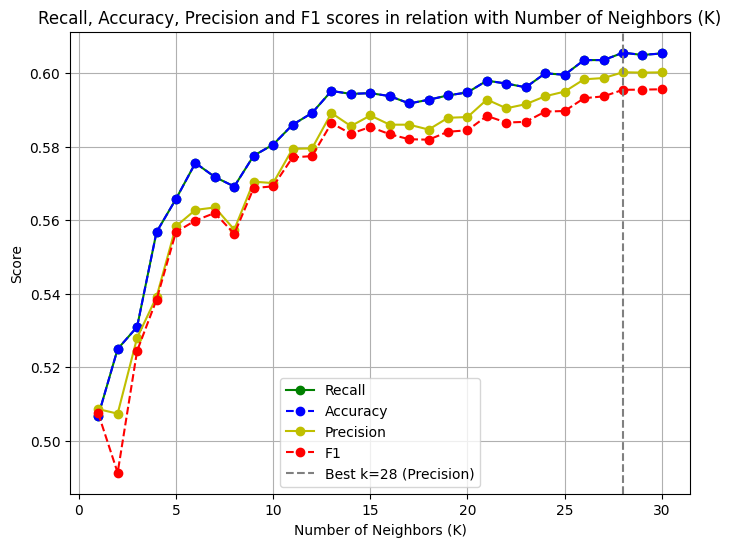

In [42]:
# Plotting Recall and Accuracy on the same plot
plt.figure(figsize=(8, 6))

plt.plot(k_values, recall_values, marker='o', linestyle='-', color='g', label='Recall')
plt.plot(k_values, accuracy_values, marker='o', linestyle='--', color='b', label='Accuracy')
plt.plot(k_values, precision_values, marker='o', linestyle='-', color='y', label='Precision')
plt.plot(k_values, f1_scores, marker='o', linestyle='--', color='r', label='F1')
plt.axvline(k_values[max_index], color='gray', linestyle='--', label=f'Best k={k_values[max_index]} (Precision)')

plt.title('Recall, Accuracy, Precision and F1 scores in relation with Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='best')
plt.show()

As accuracy and recall and are basically almost the same, it can mean these things:
1. Balanced Classes
2. High model performance
3. Few false negatives

The plot show that the best measure what we can use is precision, with $k = 19$ neighbours. 

In [43]:
# cross validation with k = 7 fold
cv_values = []
cv_means = []

for knn_classifies in knn_fit:
    cv_values.append(cross_val_score(knn_classifies, X_train, y_train, cv=7, scoring='precision_macro'))
for i in range(len(k_values)):
    cv_means.append(cv_values[i].mean())

In [44]:
print(f"For {k_values[max_index]} neighbors the cross validation scores for precision are {cv_values[max_index]}")
print(f"With their mean {cv_means[max_index]}")
print(60*'-')

For 28 neighbors the cross validation scores for precision are [0.61378919 0.60216596 0.59415607 0.61679497 0.62957518 0.58381635
 0.59066347]
With their mean 0.6044230276035476
------------------------------------------------------------


In [45]:

final_model = KNeighborsClassifier(n_neighbors=max_index).fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)
test_precision = precision_score(y_test, y_test_pred, average='macro')

print(f"Best number of neighbors (k) based on CV precision: {max_index+1}")
print(f"Test set precision with best k: {test_precision}")

Best number of neighbors (k) based on CV precision: 28
Test set precision with best k: 0.5987088961029221


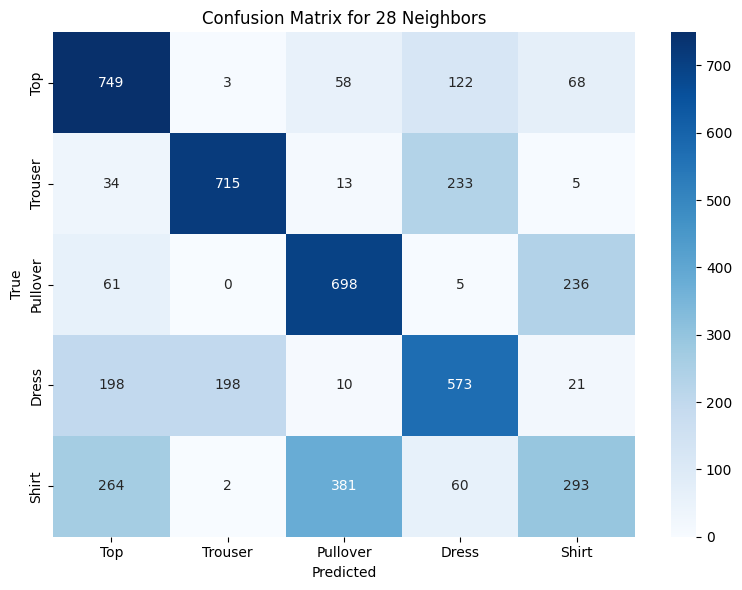

In [46]:
# Confusion matrix for best k

def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(class_mapping.values()), yticklabels=list(class_mapping.values()))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred[max_index], f'Confusion Matrix for {k_values[max_index]} Neighbors')
